In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.__version__

'1.5.3'

In [3]:
distances_bert = dict()
cultures = list()
with open('../../data/distances/mean_cosine_distances_tfidf_ctime_7.txt', 'r') as file:
    for line in file:
        _, pair, _, m_distance = line.strip().split(' ')
        c1, c2 = pair.split('-')
        if c1 not in cultures:
            cultures.append(c1)
        if c2 not in cultures:
            cultures.append(c2)
            
        distances_bert[(c1, c2)] = 1 - np.float64(m_distance)

distances_bert

{('Sican', 'Cajamarca'): 0.8720082575604153,
 ('Sican', 'Nasca'): 0.6994273327750306}

In [4]:
df = pd.DataFrame(index=sorted(cultures), columns=sorted(cultures))

for c in cultures:
    df[c] = df[c].astype(np.float64)
df.head()

,Cajamarca,Nasca,Sican
Cajamarca,NaN,NaN,NaN
Nasca,NaN,NaN,NaN
Sican,NaN,NaN,NaN


In [5]:
for c1 in cultures:
    for c2 in cultures:
        if c1 == c2:
            df[c1][c2] = 0
        elif (c1, c2) in distances_bert.keys():
            df[c1][c2] = distances_bert[(c1, c2)]
            df[c2][c1] = distances_bert[(c1, c2)]
        elif (c2, c1) in distances_bert.keys():
            df[c1][c2] = distances_bert[(c2, c1)]
            df[c2][c1] = distances_bert[(c2, c1)]
        else:
            df[c1][c2] = 0.0
            df[c2][c1] = 0.0

In [6]:
df

,Cajamarca,Nasca,Sican
Cajamarca,0.000000,0.000000,0.872008
Nasca,0.000000,0.000000,0.699427
Sican,0.872008,0.699427,0.000000


### Creamos un heatmap con las distancias

### Escalamos las distancias promedios para poder ver gráficamente mayores diferencias

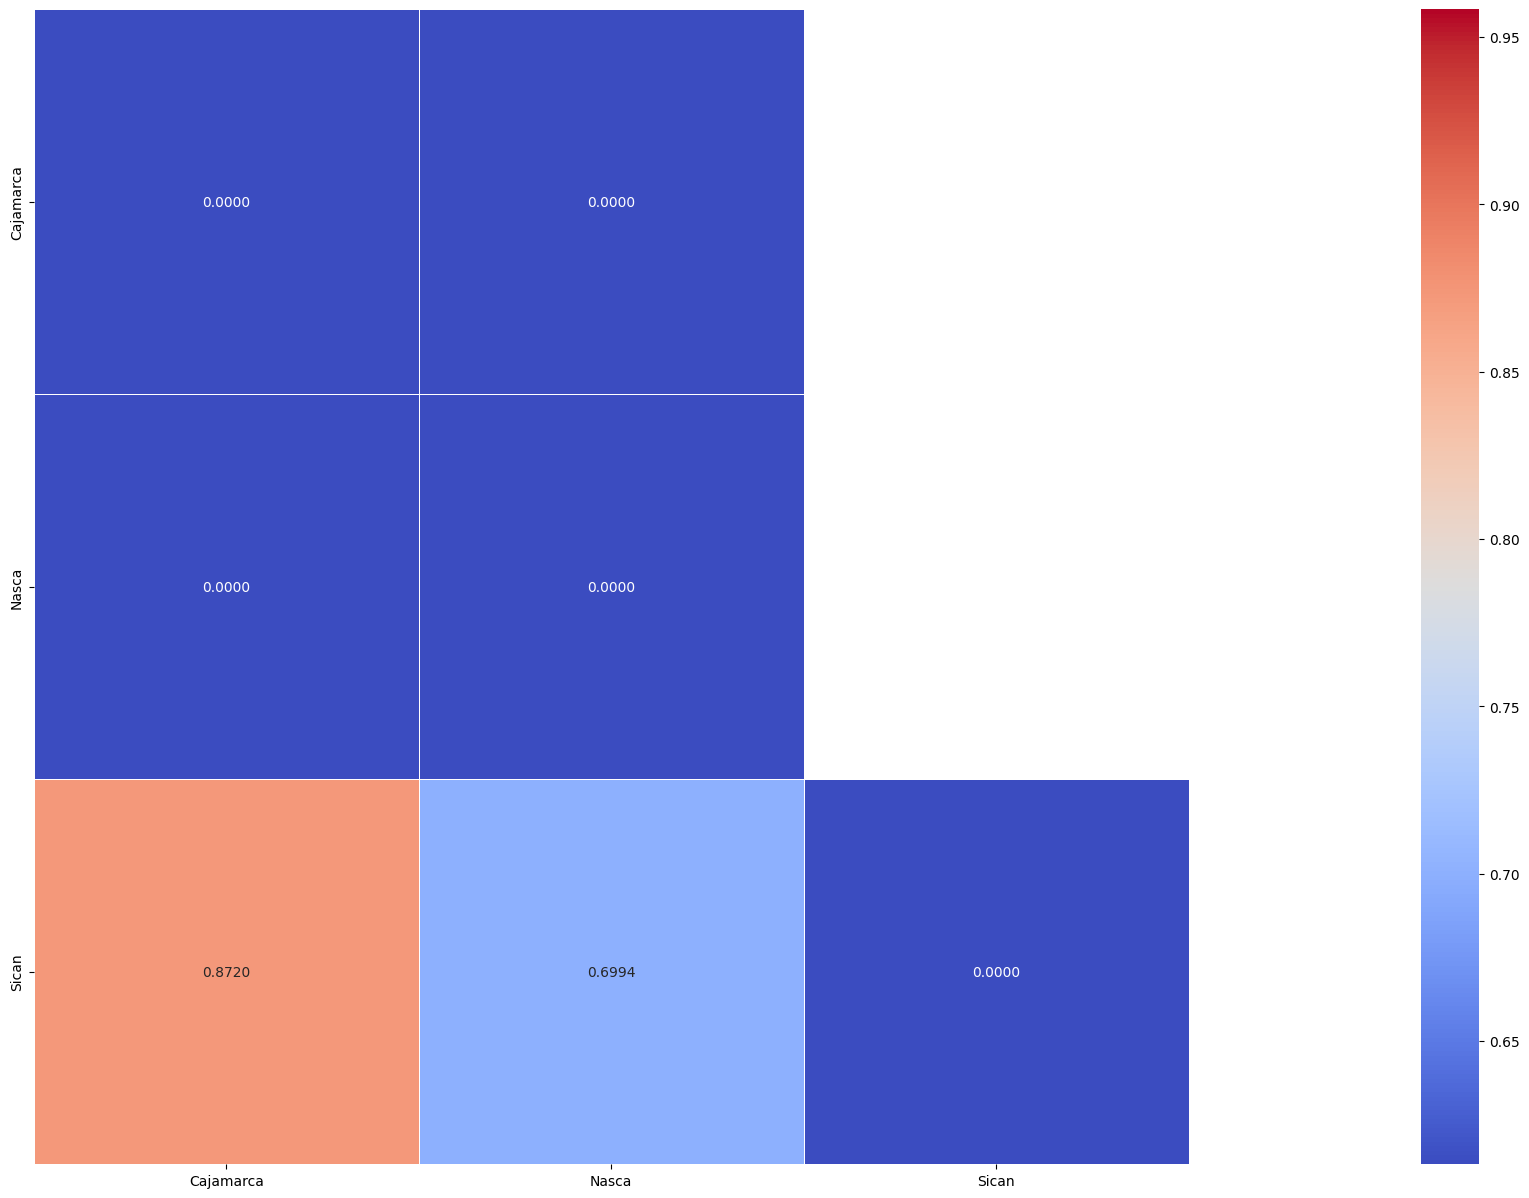

In [7]:
max_mean_distance = np.max(list(distances_bert.values()))
min_mean_distance = np.min(list(distances_bert.values()))
std_mean_distance = np.std(list(distances_bert.values()))

fig, ax = plt.subplots(figsize=(60, 15))
sns.heatmap(df, 
            vmax=max_mean_distance+std_mean_distance, 
            vmin=min_mean_distance-std_mean_distance, 
            cmap='coolwarm', 
            linewidths=.5, 
            square=True,
            annot=True,
            fmt=".4f",
            mask=np.triu(df),
            ax=ax)
plt.show()

In [8]:
culture_pairs = [(a, b) for idx, a in enumerate(cultures) for b in cultures[idx + 1:]]
culture_pairs

[('Sican', 'Cajamarca'), ('Sican', 'Nasca'), ('Cajamarca', 'Nasca')]